In [1]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature
import utils
import blend

img_list = utils.load_images('../input_image/parrington')

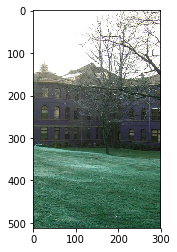

In [2]:
plt.imshow(img_list[0][:,-300:])
plt.show()

In [3]:
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

blended_image = cylinder_img_list[0].copy()
img = cylinder_img_list[1].copy()

print('Find corner response 1')
corner_response1 = feature.harris_corner(blended_image)
descriptors1, position1 = feature.extract_description(blended_image, corner_response1, kernel=5)

print('Find corner response 2')
corner_response2 = feature.harris_corner(img)
descriptors2, position2 = feature.extract_description(img, corner_response2, kernel=5)

print('Feature matching')
mp = feature.matching(descriptors1, descriptors2, position1, position2)

print('Find best shift using RANSAC')
shift = blend.RANSAC(mp)

Find corner response 1
Find corner response 2
Feature matching
Find best shift using RANSAC


In [5]:
# img should bigger than img2
def blending(img1, img2, shift):
    padding = [
        (shift[0], 0) if shift[0] > 0 else (0, shift[0]),
        (shift[1], 0) if shift[1] > 0 else (0, shift[1]),
        (0, 0)
    ]
    shifted_img1 = np.lib.pad(img1, padding, 'constant', constant_values=0)
    
    h1, w1, _ = shifted_img1.shape
    h2, w2, _ = img2.shape
    
    inv_shift = [h1-h2, w1-w2]
    inv_padding = [
        (inv_shift[0], 0) if shift[0] < 0 else (0, inv_shift[0]),
        (inv_shift[1], 0) if shift[1] < 0 else (0, inv_shift[1]),
        (0, 0)
    ]
    shifted_img2 = np.lib.pad(img2, inv_padding, 'constant', constant_values=0)


#    plt.imshow(shifted_img)
#    plt.show()
#    plt.imshow(shifted_img2)
#    plt.show()

    for y in range(h1):
        for x in range(w1):
            color1 = shifted_img1[y][x]
            color2 = shifted_img2[y][x]
            
            if list(color1) == [0, 0, 0]:
                shifted_img1[y][x] = color2
            elif list(color2) == [0, 0, 0]:
                shifted_img1[y][x] = shifted_img1[y][x]
            else:
                ratio = x/w1
                if ((color1 - color2)**2).sum() > 100:
                    ratio = 1
                shifted_img1[y][x] = (1-ratio)*color1 + ratio*color2
      
    return shifted_img1

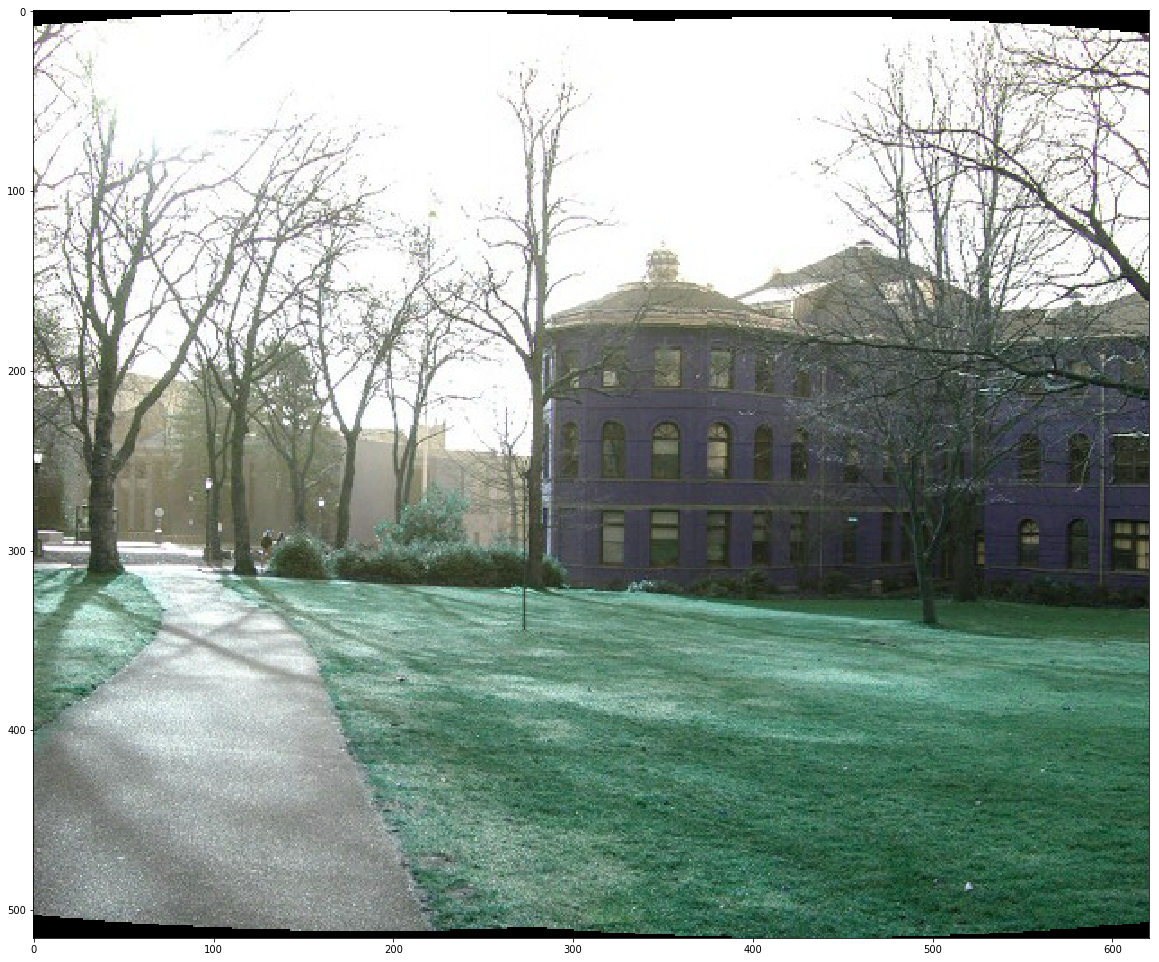

In [6]:
iii = blending(blended_image, img, shift)

plt.figure(figsize=(20,20))
plt.imshow(iii)
plt.show()

In [7]:
a,b=[2,1]

In [8]:
a


2

In [36]:
[(y, x) for y in range(5) for x in range(2)]

[(0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (2, 0),
 (2, 1),
 (3, 0),
 (3, 1),
 (4, 0),
 (4, 1)]

In [ ]:
import multiprocessing as mp
pool = mp.Pool(4)#mp.cpu_count())
a = pool.map(f, [(img_list[0][y][x], img_list[0][y][x], x/1000) for y in range(100) for x in range(200)])

In [38]:
def f(x,y,z):
    return [255,0,0]

In [2]:
e2e = cv2.imread('tmp18.jpg')

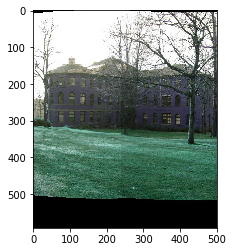

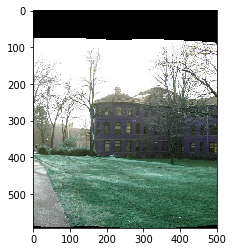

In [3]:
p1 = e2e[:,:500]
p2 = e2e[:,-500:]

plt.imshow(p1)
plt.show()
plt.imshow(p2)
plt.show()

In [4]:
cr = feature.harris_corner(p1)
ds, pos = feature.extract_description(p1, cr, kernel=5, threshold=0.05)

cr2 = feature.harris_corner(p2)
ds2, pos2 = feature.extract_description(p2, cr2, kernel=5, threshold=0.05)

In [61]:
mmp =  feature.matching(ds, ds2, pos, pos2, y_range=150)

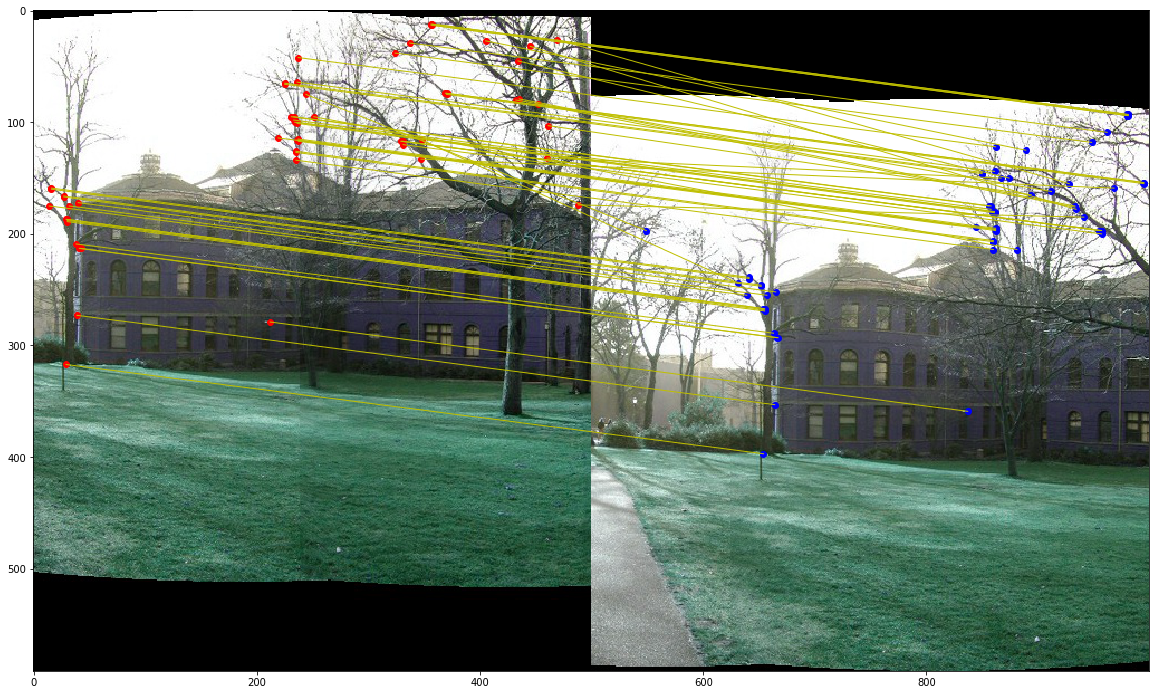

In [62]:

_, offset, _ = p2.shape
plt_img = np.concatenate((p1, p2), axis=1)
plt.figure(figsize=(20,20))
plt.imshow(plt_img)
for i in range(len(mmp)//1):
    plt.scatter(x=mmp[i][0][1], y=mmp[i][0][0], c='r')
    plt.plot([mmp[i][0][1], offset+mmp[i][1][1]], [mmp[i][0][0], mmp[i][1][0]], 'y-', lw=1)
    plt.scatter(x=offset+mmp[i][1][1], y=mmp[i][1][0], c='b')
plt.show()

In [28]:
y_shift, _ = blend.RANSAC(mmp)

In [29]:
y_shift

-80

In [30]:
ee = e2e.copy()
col_shift = np.linspace(y_shift,0,num=e2e.shape[1], dtype=np.uint8)
print(col_shift)
for x in range(e2e.shape[1]):
    ee[:,x] = np.roll(e2e[:,x], col_shift[x], axis=0)

[176 177 177 ...,   0   0   0]


In [20]:
ee[1,:]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [32]:
ii = cv2.imread('tmp/aligned.jpg')

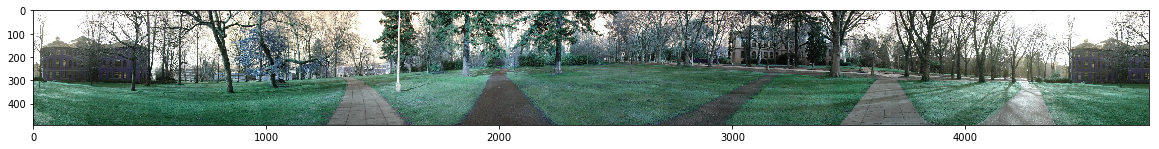

In [56]:
plt.figure(figsize=(20,20))
plt.imshow(iiiii)
plt.show()

In [34]:
iii = cv2.cvtColor(ii, cv2.COLOR_BGR2GRAY)


In [38]:
_, thresh = cv2.threshold(iii, 1, 255, cv2.THRESH_BINARY)


In [55]:
mmm = np.mean(thresh, axis=1)

upper = -1
for y in range(thresh.shape[0]):
    if len(np.where(thresh[y] == 0)[0]) == 0:
        upper = y
        break
upper
    
lower = -1
for y in range(thresh.shape[0]-1, 0, -1):
    if len(np.where(thresh[y] == 0)[0]) == 0:
        lower = y
        break

print(upper, lower)

iiiii = ii[upper:lower, :]


94 585


In [52]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [57]:
def crop(img):
    _, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)
    upper, lower = [-1, -1]

    for y in range(thresh.shape[0]):
        if len(np.where(thresh[y] == 0)[0]) == 0:
            upper = y
            break
        
    for y in range(thresh.shape[0]-1, 0, -1):
        if len(np.where(thresh[y] == 0)[0]) == 0:
            lower = y
            break

    return img[upper:lower, :]

In [58]:
a=crop(ii)

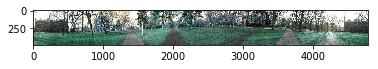

In [60]:
plt.imshow(a)
plt.show()